In [17]:
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

In [15]:
# Lendo o arquivo csv escolhido
dg = pd.read_csv('forestfires.csv', engine='python')

In [5]:
# Printando o começo do arquivo para testar
dg.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [13]:
# Removendo Colunas que não serão usadas
dg.drop(columns=['FFMC', 'DMC', 'DC', 'ISI'])

,X,Y,month,day,temp,RH,wind,rain,area
0,7,5,mar,fri,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,22.8,40,4.0,0.0,0.00


In [18]:
por_estado = dg.groupby('month')['day'].count().sort_values(ascending=[False])
print(por_estado)

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: day, dtype: int64


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text xticklabel objects>)

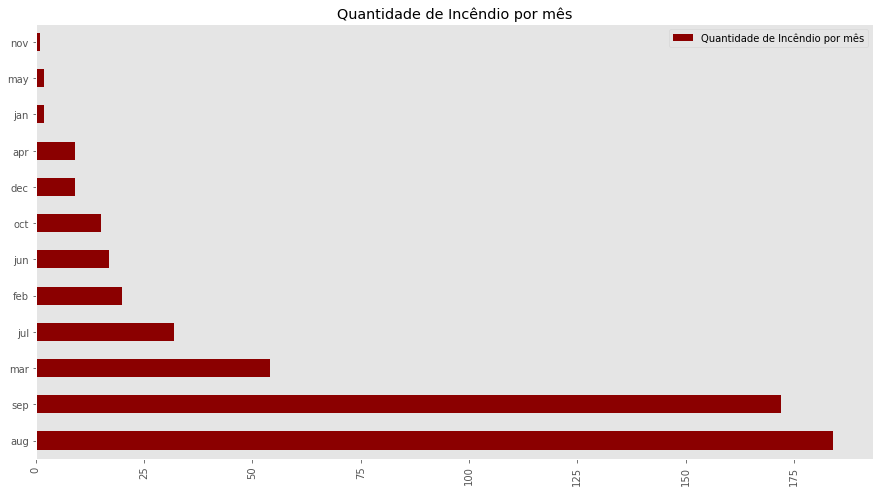

In [34]:
plt.style.use("ggplot")
a = dg['month'].value_counts().sort_values(ascending=[False])
# Label == nome do título
# Subplots se refere ao título (True, False)
a.plot(kind='barh', subplots=True, label="Quantidade de Incêndio por mês" ,figsize=(15, 8), grid=False, color='darkred', legend=True)
plt.xticks(rotation=90)